In [8]:
import numpy as np
import matplotlib.pyplot as plt

rand = np.random.rand
from numpy import sin, cos, sqrt, log, pi

In [3]:
K = 1_000
n_tau = 20
d_tau = 0.5
Nd = 3

In [9]:
# box_muller



R = rand(K)
S = rand(K)

P = sqrt(-2*log(R))*sin(2*pi*S)
Q = sqrt(-2*log(R))*cos(2*pi*S)

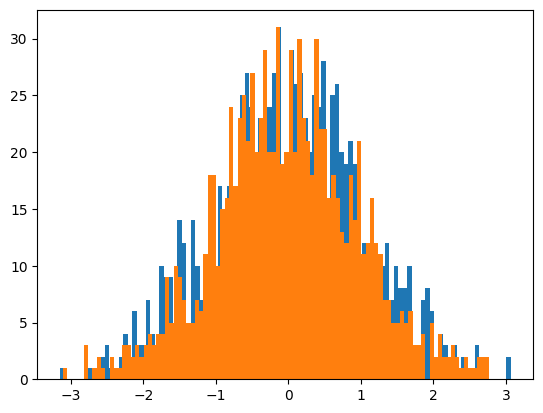

In [14]:
plt.hist(Q, 100);
plt.hist(P, 100);

In [18]:
def action(x, A):
    a = 0
    for i in range(Nd):
        for j in range(i):
            a += x[i] * A[i, j] * x[j]
        a += 0.5 * A[i, i] * x[i] ** 2
    return a

In [19]:
def hamilton(x, p, A):
    ham = action(x, A)
    for i in range(Nd):
        ham += 0.5 * p[i] ** 2
    return ham

In [ ]:
def del_h(x, A, delh):
    for i in range(Nd):
        delh[i] = 0.0
    for i in range(Nd):
        for j in range(Nd):
            delh[i] += A[i, j] * x[j]

-0.7824143696091788 0.8938986156227278 1.0431289847885248 0.9
0.10824736157977768 -0.20422468760512927 -0.4043919173177827 0.9
-0.6791637496644123 -0.9308956626237479 0.3828157636246481 0.9
0.6337580301777799 -1.1251955113933017 0.025050239006078168 0.875
-2.284255510390689 0.6571098423778736 -0.22491134892300618 0.9
0.11066421227756237 -1.064534973090037 0.832335693380469 0.8833333333333333
0.025510349366372642 -0.03948782692184355 -0.10106484926584156 0.9
-0.9445176443745733 -0.992937170001641 0.8340459360501213 0.8875
-0.5692900931727367 1.0705880034860729 -1.1027303234172603 0.9
3.1656042694469337 -0.9270518681720072 0.26630702229956127 0.91
2.8552623521870037 0.16284591827546152 -1.751951658259533 0.9181818181818182
-1.2431868990216182 0.019988882420172743 -0.9569365341846174 0.9166666666666666
-2.7905658630481063 0.28405480974500974 1.285730858693885 0.9230769230769231
1.5628666322413158 -1.035845783153915 0.3812697406528486 0.9285714285714286
0.7434421165713001 -0.55445682301642

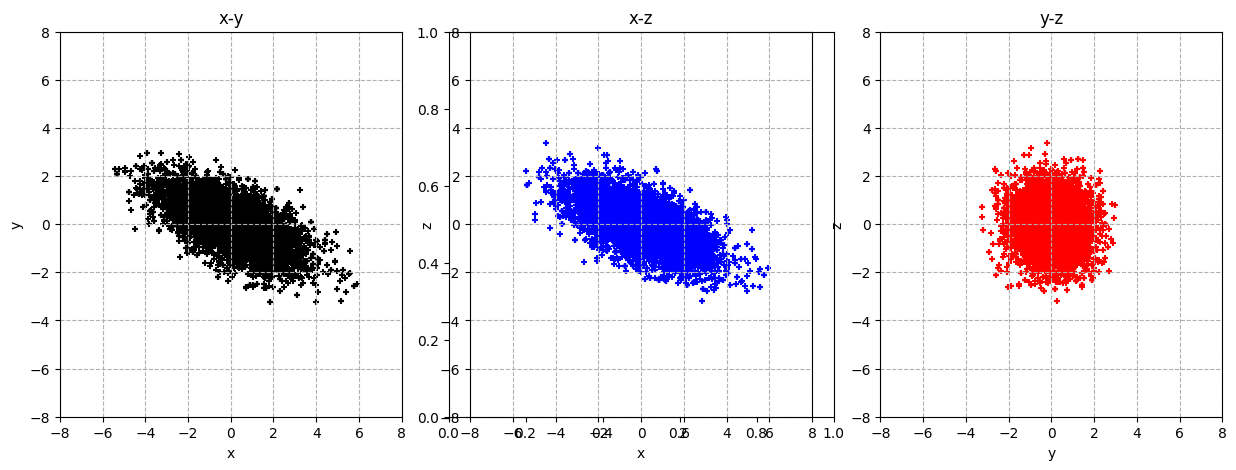

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# seed of random numbers is the system time by default
# Numpy has Gaussian random number generator, so we don't use Box-Muller

NITER = 100_000
NTAU = 20
DTAU = 0.5
NDIM = 3

A=[
[1.0,1.0,1.0],
[1.0,2.0,1.0],
[1.0,1.0,2.0]
]
A=np.array(A)
##################################
### Calculation of the action  ###
##################################
#When you change the action, you should also change dH/dx, specified in "calc_delh".
def calc_action(x,A):
    return np.dot(x,np.dot(A,x))*0.5
######################################
### Calculation of the Hamiltonian ###
######################################
def calc_hamiltonian(x,p,A):
    ham = calc_action(x,A)
    ham += 0.5*np.dot(p,p)
    return ham
#############################
### Calculation of dH/dx  ###
#############################
def calc_delh(x):
    delh = np.dot(A,x)
    return delh
############################
### Molecular evolution  ###
############################
def Molecular_Dynamics(x,A):
    # Mementum p is chosen to be Gaussian
    p = np.random.randn(NDIM)
    # calculate Hamiltonian
    ham_init = calc_hamiltonian(x,p,A)
    # first step of leap frog
    x += p*0.5*DTAU
    # 2nd, ..., Ntau-th steps
    for step in range(1,NTAU):
        delh = calc_delh(x)
        p += -delh*DTAU
        x += p*DTAU
    # last step of leap frog
    delh=calc_delh(x)
    p += -delh*DTAU
    x += p*0.5e0*DTAU
    # calculate Hamiltonian again
    ham_fin = calc_hamiltonian(x,p,A)
    return x,ham_init,ham_fin
#####################################
### Set the initial configuration ###
#####################################
x = np.zeros(NDIM)
naccept = 0#counter for the number of acceptance
#################
### Main Loop ###
#################

# for plot
data_for_plot = []

for iter in range(NITER):
    # We have to use "np.copy" here 
    backup_x = np.copy(x)
    x,ham_init,ham_fin = Molecular_Dynamics(x,A)
    metropolis = np.random.uniform(0,1)
    if(np.exp(ham_init-ham_fin) > metropolis):#accept
        naccept = naccept+1
    else:#reject
        # We have to use "np.copy" here 
        x = np.copy(backup_x)
    ###################
    ### data output ###
    ###################
    if((iter+1)%10 == 0):#output the results every ten steps.
        print(*x,naccept/(iter+1))
        data_for_plot.append(x)

data1=[data_for_plot[i][0] for i in range(len(data_for_plot))]
data2=[data_for_plot[i][1] for i in range(len(data_for_plot))]
data3=[data_for_plot[i][2] for i in range(len(data_for_plot))]


############
### plot ###
############
plt.figure(figsize=(15,5))
plt.axes().set_aspect('equal')
##
ax1 = plt.subplot(1, 3, 1)
ax1.scatter(data1,data2,c="black", s=20, marker="+")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlim([-8,8])
ax1.set_ylim([-8,8])
ax1.set_title("x-y")
ax1.grid(linestyle = "--")
##
ax2 = plt.subplot(1, 3, 2)
ax2.scatter(data1,data3,c="blue", s=20, marker="+")
ax2.set_xlim([-8,8])
ax2.set_ylim([-8,8])
ax2.set_xlabel("x")
ax2.set_ylabel("z")
ax2.set_title("x-z")
ax2.grid(linestyle = "--")
##
ax3 = plt.subplot(1, 3, 3)
ax3.scatter(data2,data3,c="red", s=20, marker="+")
ax3.set_xlim([-8,8])
ax3.set_ylim([-8,8])
ax3.set_xlabel("y")
ax3.set_ylabel("z")
ax3.set_title("y-z")
ax3.grid(linestyle = "--")
plt.show()